## 5.2 합성곱층

In [1]:
# 텐서플로의 케라스 모델을 사용하여 합성곱 신경망 모델을 구성합니다. 
# Sequential 모델을 먼저 만듭니다. 그리고 순서대로 연결된 층을 구성해 나갑니다. 
# 합성곱층을 Conv2D 를 통해 구현합니다. 
# 첫번째 합성곱 층에서는 입력을 함께 받습니다. 
# 이 때, 필터의 갯수, 커널사이즈, 스트라이드, 패딩 값을 정의합니다. 
# 필터의 갯수는 32개, 커널사이즈는 3x3, 픽셀이동 단위인 스트라이드는 1로 정의하고 
# 패딩을 same 으로 정의하여 입력과 출력의 크기가 같아지게 구현합니다. 
# 그리고 합성곱층을 하나 더 구현해 봅니다. 
# 이때는 패딩을 valid로 설정하여 패딩을 하지 않습니다. 
# 이렇게 구성하게 되면 두 번째 층에서는 입력보다 출력의 크기가 작아집니다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', input_shape=(32,32, 3)))
print(model.output_shape)
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid',))
print(model.output_shape)

(None, 32, 32, 32)
(None, 30, 30, 32)


In [2]:
# model.summary() 를 통해  Output Shape 를 확인해 보면 (None, 30, 30, 32) 으로 출력이 32에서 30으로 줄어든 것을 볼 수 있습니다.

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


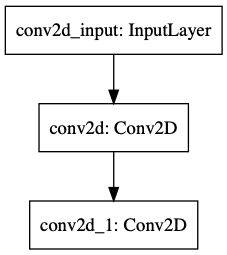

In [3]:
plot_model(model)

## 5.3 풀링층

In [4]:

# 합성곱 과정을 거친 층의 사이즈를 줄여주기 위해 서브샘플링을 합니다. 
# 이 과정을 통해 데이터의 사이즈를 줄여주기 때문에 빠르게 학습을 할 수 있습니다. 
# 합성곱층인 Conv2D층 아래에 MaxPooling2D 를 통해 풀링과정을 거치도록 모델을 변경하였습니다. 
# 그리고 Flatten을 통해 1차원 배열로 완전연결네트워크를 구성합니다. 
# 이 때, 활성화 함수로는 relu를 사용합니다. 
# 그리고 날씨를 5가지 'cloudy', 'shine', 'sunrise', 'rainy', 'foggy' 로 분류할 수 있도록 출력을 5로 설정하고 비율로 반환이 되도록 활성화 함수로 softmax 를 사용했습니다. 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', input_shape=(150,150, 3),))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=1, padding='valid',))
model.add(MaxPooling2D(2,2))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(256, activation='relu'))    
model.add(Dense(5, activation='softmax'))

(None, 36, 36, 32)
(None, 41472)


In [5]:
# model.summary() 를 통해 모델을 요약해 보면 (None, 150, 150, 32) 크기의 출력이 
# 맥스풀링을 거치며  (None, 75, 75, 32) 출력으로 줄어든 것을 볼 수 있습니다.  
# valid 패딩을 사용한 다음 합성곱 층에서 맥스풀링까지 진행하고 나면 
# 출력이 (None, 36, 36, 32) 로 줄어들게 됩니다. 
# 이렇게 합성곱과 풀링 연산을 진행하면 전체 데이터의 사이즈가 줄어들어 
# 연산에 들어가는 컴퓨팅 리소스가 줄어드는 장점이 있으며 데이터의 크기를 줄이며 
# 소실이 발생하기 때문에 오버피팅을 방지 합니다.

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               10617088  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                

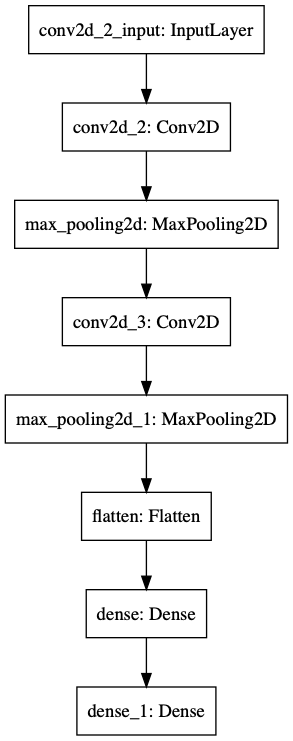

In [6]:
plot_model(model)